In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the dataset
df = pd.read_csv(r"""Algerian Cleanned dataset.csv""")

In [44]:
# Remove Unusual columns
df.drop('Unnamed: 0',axis = 1, inplace=True)

In [45]:
# Showing the dataset
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,Bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,Bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,Sidi Bel-abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0.0,Sidi Bel-abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,Sidi Bel-abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,Sidi Bel-abbes,2012-09-29


## Now perform basic EDA Operation

In [46]:
# Looking into general statistical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.664754,14.204824,1.1,6.000,12.25,22.525,68.0
Classes,244.0,0.565574,0.496700,0.0,0.000,1.00,1.000,1.0


In [47]:
# Checking is null value is present or not
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
Date           0
dtype: int64

In [48]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


In [49]:
# Dropping the unnexessary column DC
df.drop(['DC'],axis=1, inplace = True)

In [50]:
# Checking column types
df.dtypes

Temperature      int64
RH               int64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
ISI            float64
BUI            float64
FWI             object
Classes        float64
Region          object
Date            object
dtype: object

In [51]:
# In FWI column there is a row where it's 
# value is non-reliable to the other dataser
# Remove that row
df[df['FWI'] == 'fire   ']

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
165,37,37,18.0,0.2,88.9,12.9,12.5,10.4,fire,1.0,Sidi Bel-abbes,2012-07-14


In [52]:
# Getting targeted row index
targetted_rowIndex = df[df['FWI'] == 'fire   '].index[0]
targetted_rowIndex

165

In [53]:
# Dropping particular row
df.drop(targetted_rowIndex, inplace=True)

In [54]:
# Change FWI column type from str to float
df['FWI'] = df['FWI'].astype(float)

In [55]:
# Converting date column to specific date_time
df['Date'] = pd.to_datetime(df['Date'])

## After cleaned data

In [56]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0,Bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0,Bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,4.5,16.9,6.5,1.0,Sidi Bel-abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0,0.0,Sidi Bel-abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,0.4,3.4,0.2,0.0,Sidi Bel-abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,1.7,5.1,0.7,0.0,Sidi Bel-abbes,2012-09-29


## Separating Dependent and Independent Features

In [57]:
# Getting Dependent Feature Temperature
y = df.iloc[:,0]

In [64]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 243, dtype: int64

In [66]:
# Getting Independent Features. Numerical Columns except temp
X = df.iloc[:, 1:-2]

In [67]:
X

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes
0,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0
1,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0
2,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0
3,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0
4,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...
239,65,14.0,0.0,85.4,16.0,4.5,16.9,6.5,1.0
240,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0,0.0
241,87,29.0,0.5,45.9,3.5,0.4,3.4,0.2,0.0
242,54,18.0,0.1,79.7,4.3,1.7,5.1,0.7,0.0


## Splitting Data with Training and Test dataset

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=310)

In [71]:
# Independent training dataset
X_train

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes
127,54,11.0,0.1,83.7,8.4,3.1,9.3,3.1,1.0
41,75,13.0,0.1,75.1,7.9,1.5,9.2,0.9,0.0
95,73,17.0,0.1,68.4,1.9,1.4,2.9,0.5,0.0
16,89,16.0,0.6,37.3,1.1,0.0,1.6,0.0,0.0
178,87,18.0,0.0,80.0,11.8,2.8,11.8,3.2,0.0
...,...,...,...,...,...,...,...,...,...
144,59,16.0,0.8,74.2,7.0,1.6,6.7,0.8,0.0
72,51,13.0,0.3,81.3,15.6,2.5,20.7,4.2,0.0
1,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0
93,86,15.0,10.1,30.5,0.7,0.0,1.1,0.0,0.0


In [72]:
# Dependent training dataset
y_train

127    35
41     31
95     29
16     30
178    29
       ..
144    33
72     35
1      29
93     22
124    29
Name: Temperature, Length: 157, dtype: int64

In [73]:
# Independent test dataset
X_test

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes
123,73,13.0,4.0,55.7,2.7,0.6,2.9,0.2,0.0
153,48,16.0,0.0,87.6,7.9,6.8,7.8,6.4,1.0
100,77,15.0,1.0,56.1,2.1,0.7,2.6,0.2,0.0
227,81,15.0,0.0,84.6,12.6,4.3,14.3,5.7,1.0
73,63,15.0,0.0,87.0,19.0,5.9,24.4,10.2,1.0
...,...,...,...,...,...,...,...,...,...
94,78,15.0,3.8,42.6,1.2,0.1,1.7,0.0,0.0
133,58,17.0,0.0,88.9,21.3,8.7,21.2,12.9,1.0
78,54,18.0,0.0,89.4,20.0,9.7,27.5,16.1,1.0
21,67,17.0,0.1,79.1,7.0,2.4,9.7,2.3,0.0


In [74]:
# Dependent test dataset
y_test

123    30
153    33
100    30
227    28
73     35
       ..
94     25
133    27
78     36
21     31
116    26
Name: Temperature, Length: 86, dtype: int64

In [80]:
# Training dataset size
X_train.shape, y_train.shape

((157, 9), (157,))

In [81]:
# Test dataset size
X_test.shape, y_test.shape

((86, 9), (86,))

## Feature Scaling or Standarize the dataset

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
scaler

StandardScaler()

In [86]:
# Apply scaler on training dataset
X_train = scaler.fit_transform(X_train)

In [87]:
# Apply scaler on test dataset
X_test = scaler.transform(X_test)

## to avoid data leaking we use transform
## instead of fit_transform

## Model training

### 1) Linear Regression Model

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
l_reg = LinearRegression()

In [93]:
l_reg.fit(X_train, y_train)

LinearRegression()

#### 👉 Coefficients and Intercepts

In [96]:
## Getting coefficient
l_reg.coef_

## Regression Coefficients tell us how much a dependent variable 
## changes with a unit change in the independent variables.

array([-1.12730494, -0.43036827,  0.01429553,  1.40849695, -0.3957393 ,
       -0.0874176 ,  0.5121844 ,  0.6195334 , -0.04843489])

In [98]:
# Getting intercept
l_reg.intercept_

# If all the independent features are 0, then Temperature of
# the Region is 32.31 acc to the model

32.318471337579616

#### 🔮 Prediction with test data

In [102]:
l_reg_pred = l_reg.predict(X_test)
l_reg_pred

array([ 2.34291801e+01,  9.88971117e+01,  1.86547824e+01,  5.91550205e+01,
        8.81152651e+01,  5.69261357e+01,  5.34457476e+01,  1.94680992e+01,
        8.35518371e+01,  1.23329771e+01,  9.56745526e+01,  7.52705920e+01,
        1.30073021e+02,  8.22420512e+00,  5.95150166e+01,  1.32678664e+02,
        4.67276331e+00,  1.27006294e+02,  8.63010397e+01,  4.44810227e+01,
        1.03368676e+02, -1.36659617e+01,  3.04289341e+01,  7.67194221e+01,
        8.74446158e+01,  9.84273629e+01,  5.67178914e+01,  9.58173878e+01,
       -1.10495359e-01,  4.45856046e+01,  7.56734365e+01,  1.07608276e+02,
        1.05894830e+02,  6.86079842e+01,  1.45618212e+02,  4.61903458e+01,
        7.83955839e+01,  6.07887178e+01,  8.79562960e+01,  7.15322799e+01,
        7.06125882e+01,  5.66737870e+01,  1.19553617e+02,  4.15300171e+01,
        2.80668081e+01,  7.39943897e+01,  8.04799596e+01, -4.96178829e+00,
        6.18081365e+01,  1.28007692e+02,  4.93039811e+01,  1.11746365e+02,
        6.92778097e+01,  

## Assumtions for linear regression

### To check whether the model is good or bad that trained

Text(0, 0.5, 'Test Predicted data')

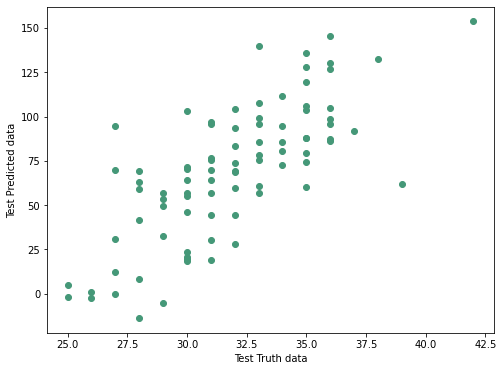

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, l_reg_pred,c='#459878')
plt.xlabel('Test Truth data')
plt.ylabel('Test Predicted data')

#### Result: As the graph showing linear relation, so the model is good

### Residuals: Getting the diff between test truth data and test predicted data

#### Objective: Calculate the error between them

In [118]:
residuals = y_test - l_reg_pred
residuals

123     6.570820
153   -65.897112
100    11.345218
227   -31.155020
73    -53.115265
         ...    
94     26.623461
133   -67.445978
78    -68.865390
21    -33.299456
116    25.118775
Name: Temperature, Length: 86, dtype: float64

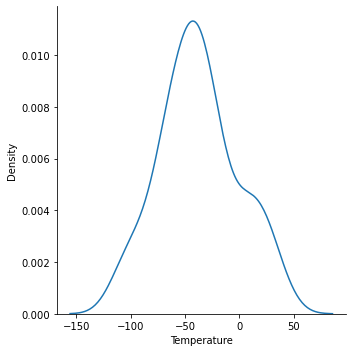

In [123]:
# Distribution of residuals
sns.displot(residuals, kind='kde')

#### Observation: 
- It's a mostly gussian distribution
- Somewhat left skewed due to outliers

## Scatter plot of Prediction and residuals

Text(0, 0.5, 'Residuals')

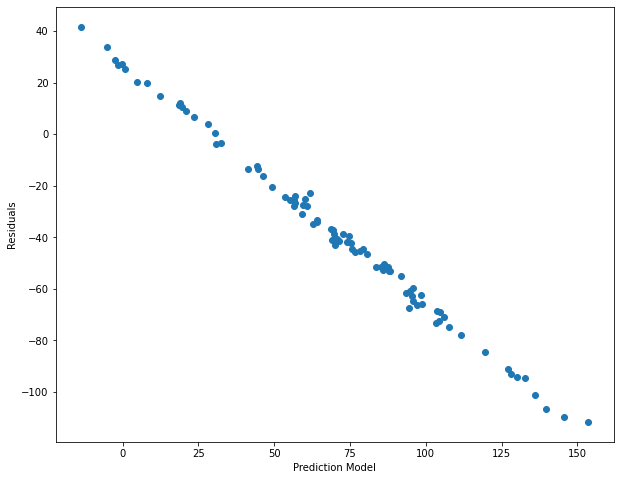

In [129]:
plt.figure(figsize=(10, 8))
plt.scatter(l_reg_pred, residuals)
plt.xlabel('Prediction Model')
plt.ylabel('Residuals')

#### Observation
- Performing a uniform distribution
- 'Homoscedasticity', or homogeneity of variances, is an assumption of equal or similar variances in different groups being compared.